### 📊 Model Evaluation Summary | Spam Email Classification
##### Author: Jose Navarro Meneses
##### Description: Compare model performance, visualize confusion matrices and ROC curves.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from pathlib import Path


In [12]:
# 📂 Load model performance metrics
results_path = Path("../models/model_performance.csv")
df_results = pd.read_csv(results_path)

print("📊 Model Evaluation Results:")
display(df_results)



📊 Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,LogisticRegression,0.984753,0.958333,0.926174,0.941980,0.986549
1,MultinomialNB,0.969507,1.000000,0.771812,0.871212,0.987592


In [13]:
# 🔄 Convert to long format for easier plotting
df_long = df.melt(id_vars="Model", var_name="Metric", value_name="Score")
df_long


,Model,Metric,Score
0,LogisticRegression,Accuracy,0.984753
1,MultinomialNB,Accuracy,0.969507
2,LogisticRegression,Precision,0.958333
3,MultinomialNB,Precision,1.000000
4,LogisticRegression,Recall,0.926174
5,MultinomialNB,Recall,0.771812
6,LogisticRegression,F1_Score,0.941980
7,MultinomialNB,F1_Score,0.871212
8,LogisticRegression,ROC_AUC,0.986549
9,MultinomialNB,ROC_AUC,0.987592


C:\Users\Junior\AppData\Local\Temp\ipykernel_20404\111129157.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Junior\Desktop\Repo\Classification\spam-email-classification\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


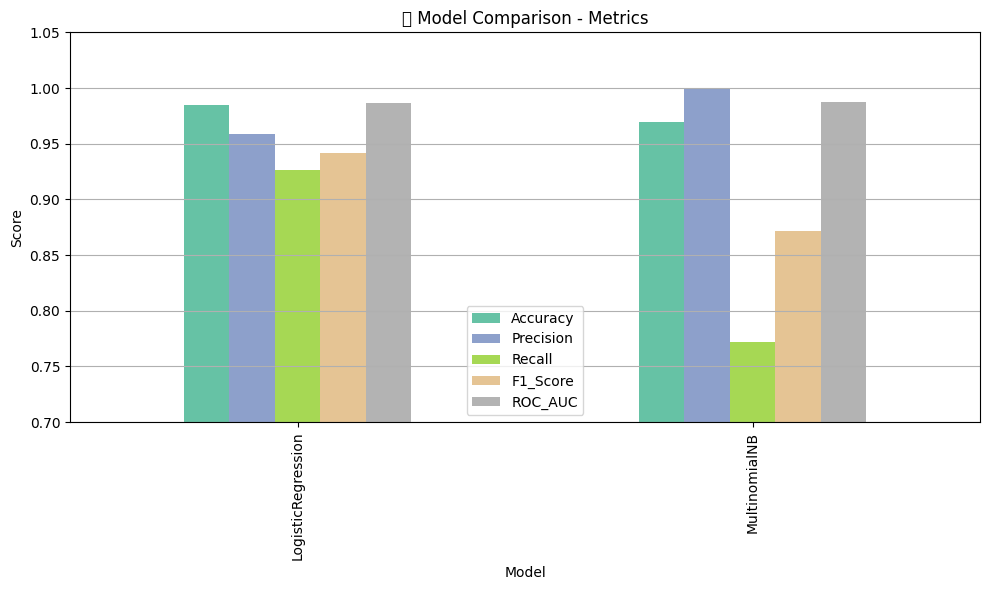

In [14]:
# Visualización comparativa de métricas
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1_Score", "ROC_AUC"]].plot(
    kind="bar", figsize=(10, 6), colormap="Set2"
)
plt.title("📈 Model Comparison - Metrics")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


📷 LogisticRegression_confusion_matrix.png


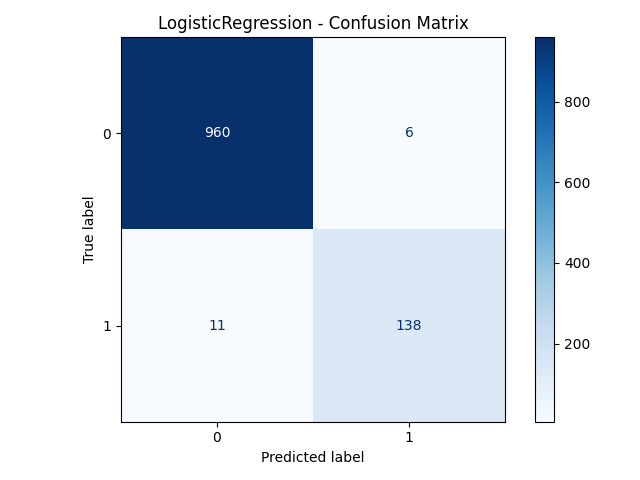

📷 MultinomialNB_confusion_matrix.png


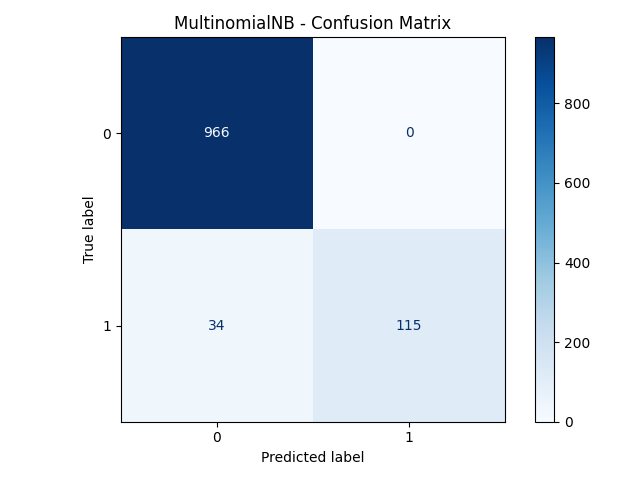

In [15]:
# Mostrar imágenes de las matrices de confusión
img_paths = [
    Path("../plots/evaluation/LogisticRegression_confusion_matrix.png"),
    Path("../plots/evaluation/MultinomialNB_confusion_matrix.png")
]

for path in img_paths:
    print(f"📷 {path.name}")
    display(Image(filename=path))


📉 ROC Curve Comparison


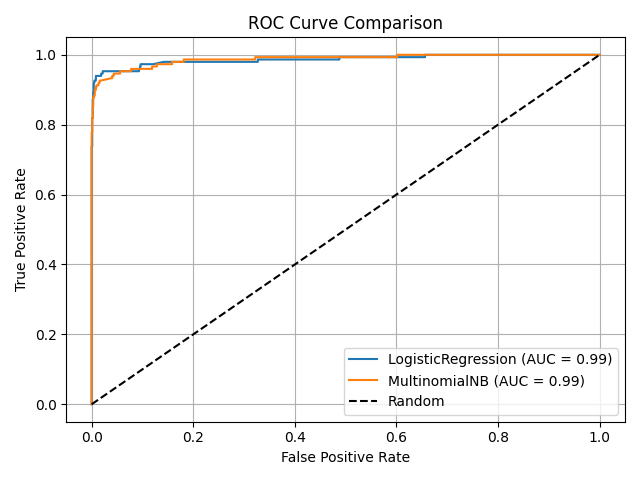

In [16]:
roc_path = Path("../plots/evaluation/roc_comparison.png")
print("📉 ROC Curve Comparison")
display(Image(filename=roc_path))


#### ✅ Observations:
##### - Logistic Regression shows a very balanced trade-off between precision and recall.
##### - Naive Bayes has perfect precision but significantly lower recall, meaning it misses many spam emails.
##### - Logistic Regression is more reliable in this case, unless false positives must be strictly avoided.

##### 📝 Final conclusion:
##### Logistic Regression generalizes better for this dataset. Naive Bayes might be improved with better preprocessing or feature selection.
